In [1]:
import os
import torch
import pickle
import random
import numpy as np
from autoencoder import *
from sklearn.model_selection import KFold

from torch import nn
from torch.utils.data import DataLoader, Subset
from torchvision import transforms
from torchvision.datasets import MNIST
from tqdm.notebook import tqdm
import matplotlib.pyplot as plt

In [2]:

encoded_space_dim = 8 # hidden layer dimension - TODO tuning

In [3]:
#%% Define paths

data_root_dir = './dataset'


#%% Create dataset

train_transform = transforms.Compose([
    transforms.ToTensor(),
])

test_transform = transforms.Compose([
    transforms.ToTensor(),
])

train_dataset = MNIST(data_root_dir, train=True,  download=True, transform=train_transform)
test_dataset  = MNIST(data_root_dir, train=False, download=True, transform=test_transform)

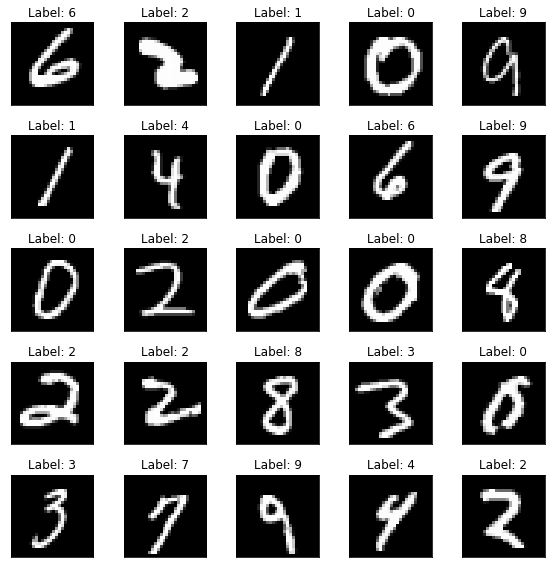

In [4]:
### Plot some sample
plt.close('all')
fig, axs = plt.subplots(5, 5, figsize=(8,8))
for ax in axs.flatten():
    img, label = random.choice(train_dataset)
    ax.imshow(img.squeeze().numpy(), cmap='gist_gray')
    ax.set_title('Label: %d' % label)
    ax.set_xticks([])
    ax.set_yticks([])
plt.tight_layout()

In [5]:
### Initialize the network
net = Autoencoder(encoded_space_dim=encoded_space_dim)

In [6]:
### Some examples
# Take an input image (remember to add the batch dimension)
img = test_dataset[0][0].unsqueeze(0)
print('Original image shape:', img.shape)
# Encode the image
img_enc = net.encode(img)
print('Encoded image shape:', img_enc.shape)
# Decode the image
dec_img = net.decode(img_enc)
print('Decoded image shape:', dec_img.shape)

Original image shape: torch.Size([1, 1, 28, 28])
Encoded image shape: torch.Size([1, 8])
Decoded image shape: torch.Size([1, 1, 28, 28])


In [7]:
#%% Prepare training

### Dimension of the batch
batch_size = 1000

### Define dataloader
train_dataloader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_dataloader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

### Define a loss function
loss_fn = torch.nn.MSELoss()

### Define an optimizer
lr = 1e-3 # Learning rate
optim = torch.optim.Adam(net.parameters(), lr=lr, weight_decay=1e-5)

device = torch.device("cpu")
# Move all the network parameters to the selected device (if they are already on that device nothing happens)
print('### ARCHITECTURE ###')
net.to(device)

### ARCHITECTURE ###


Autoencoder(
  (encoder_cnn): Sequential(
    (0): Conv2d(1, 8, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(8, 16, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): Conv2d(16, 32, kernel_size=(3, 3), stride=(2, 2))
    (5): ReLU(inplace=True)
  )
  (encoder_lin): Sequential(
    (0): Linear(in_features=288, out_features=64, bias=True)
    (1): ReLU(inplace=True)
    (2): Linear(in_features=64, out_features=8, bias=True)
  )
  (decoder_lin): Sequential(
    (0): Linear(in_features=8, out_features=64, bias=True)
    (1): ReLU(inplace=True)
    (2): Linear(in_features=64, out_features=288, bias=True)
    (3): ReLU(inplace=True)
  )
  (decoder_conv): Sequential(
    (0): ConvTranspose2d(32, 16, kernel_size=(3, 3), stride=(2, 2))
    (1): ReLU(inplace=True)
    (2): ConvTranspose2d(16, 8, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), output_padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): ConvT

EPOCH 1/20
	 partial train loss: 0.198732
	 partial train loss: 0.198405
	 partial train loss: 0.197921
	 partial train loss: 0.197662
	 partial train loss: 0.197143
	 partial train loss: 0.196956
	 partial train loss: 0.196591
	 partial train loss: 0.196218
	 partial train loss: 0.195824
	 partial train loss: 0.195559
	 partial train loss: 0.195224
	 partial train loss: 0.194814
	 partial train loss: 0.194556
	 partial train loss: 0.194376
	 partial train loss: 0.193805
	 partial train loss: 0.193400
	 partial train loss: 0.193055
	 partial train loss: 0.192571
	 partial train loss: 0.192106
	 partial train loss: 0.191741
	 partial train loss: 0.191289
	 partial train loss: 0.190730
	 partial train loss: 0.190192
	 partial train loss: 0.189599
	 partial train loss: 0.188689
	 partial train loss: 0.188002
	 partial train loss: 0.186987
	 partial train loss: 0.185667
	 partial train loss: 0.184216
	 partial train loss: 0.182122
	 partial train loss: 0.179732
	 partial train loss: 0.1774

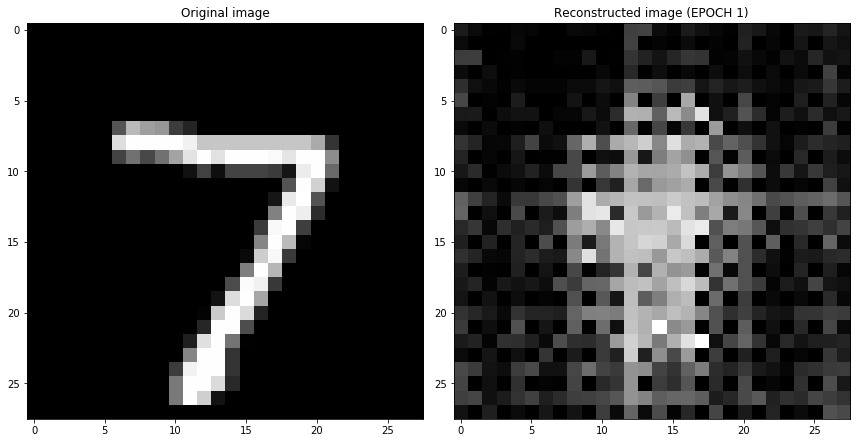

<Figure size 432x288 with 0 Axes>

EPOCH 2/20
	 partial train loss: 0.082007
	 partial train loss: 0.082418
	 partial train loss: 0.080515
	 partial train loss: 0.081274
	 partial train loss: 0.080592
	 partial train loss: 0.080324
	 partial train loss: 0.078116
	 partial train loss: 0.077819
	 partial train loss: 0.077830
	 partial train loss: 0.075493
	 partial train loss: 0.074820
	 partial train loss: 0.075686
	 partial train loss: 0.075595
	 partial train loss: 0.073349
	 partial train loss: 0.073409
	 partial train loss: 0.073178
	 partial train loss: 0.072326
	 partial train loss: 0.072369
	 partial train loss: 0.073381
	 partial train loss: 0.072619
	 partial train loss: 0.072116
	 partial train loss: 0.071895
	 partial train loss: 0.071137
	 partial train loss: 0.071995
	 partial train loss: 0.072367
	 partial train loss: 0.070266
	 partial train loss: 0.070626
	 partial train loss: 0.070462
	 partial train loss: 0.071335
	 partial train loss: 0.071015
	 partial train loss: 0.069801
	 partial train loss: 0.0710

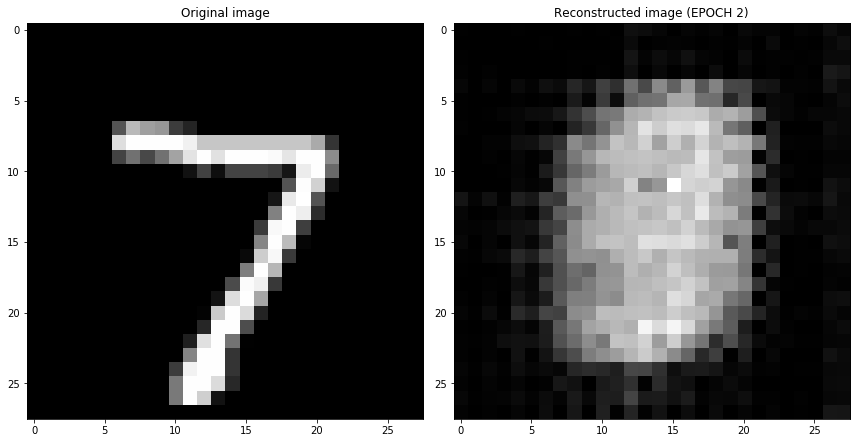

<Figure size 432x288 with 0 Axes>

EPOCH 3/20
	 partial train loss: 0.068235
	 partial train loss: 0.068352
	 partial train loss: 0.068625
	 partial train loss: 0.068649
	 partial train loss: 0.069774
	 partial train loss: 0.068678
	 partial train loss: 0.069104
	 partial train loss: 0.068095
	 partial train loss: 0.069333
	 partial train loss: 0.069320
	 partial train loss: 0.068279
	 partial train loss: 0.068527
	 partial train loss: 0.068527
	 partial train loss: 0.069293
	 partial train loss: 0.066624
	 partial train loss: 0.068149
	 partial train loss: 0.067392
	 partial train loss: 0.069609
	 partial train loss: 0.069123
	 partial train loss: 0.067876
	 partial train loss: 0.067231
	 partial train loss: 0.067715
	 partial train loss: 0.067903
	 partial train loss: 0.067379
	 partial train loss: 0.066961
	 partial train loss: 0.067365
	 partial train loss: 0.068612
	 partial train loss: 0.069111
	 partial train loss: 0.067926
	 partial train loss: 0.067899
	 partial train loss: 0.066363
	 partial train loss: 0.0668

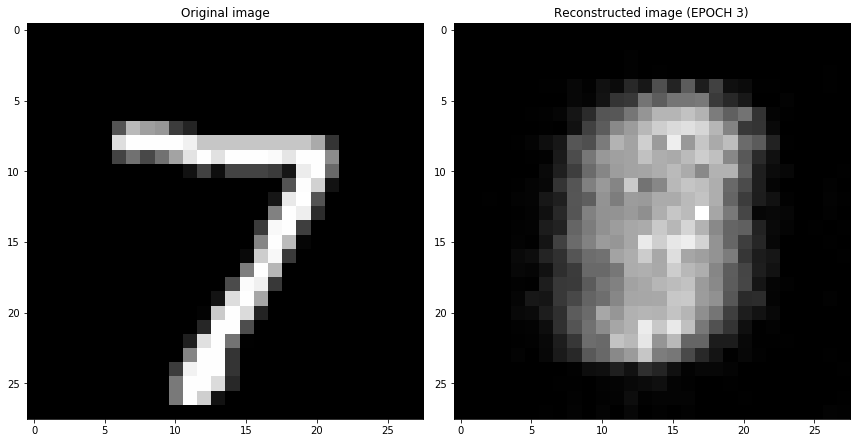

<Figure size 432x288 with 0 Axes>

EPOCH 4/20
	 partial train loss: 0.065365
	 partial train loss: 0.065930
	 partial train loss: 0.065845
	 partial train loss: 0.065152
	 partial train loss: 0.065780
	 partial train loss: 0.066046
	 partial train loss: 0.065547
	 partial train loss: 0.066253
	 partial train loss: 0.065641
	 partial train loss: 0.065042
	 partial train loss: 0.065353
	 partial train loss: 0.065265
	 partial train loss: 0.065258
	 partial train loss: 0.065723
	 partial train loss: 0.065523
	 partial train loss: 0.066374
	 partial train loss: 0.065588
	 partial train loss: 0.066191
	 partial train loss: 0.065439
	 partial train loss: 0.065754
	 partial train loss: 0.065595
	 partial train loss: 0.065027
	 partial train loss: 0.065351
	 partial train loss: 0.064710
	 partial train loss: 0.064474
	 partial train loss: 0.065333
	 partial train loss: 0.064871
	 partial train loss: 0.065150
	 partial train loss: 0.065326
	 partial train loss: 0.064244
	 partial train loss: 0.065380
	 partial train loss: 0.0656

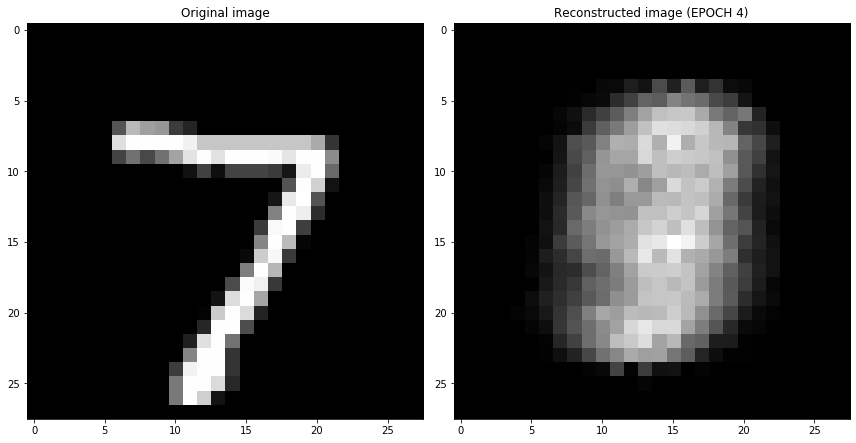

<Figure size 432x288 with 0 Axes>

EPOCH 5/20
	 partial train loss: 0.064835
	 partial train loss: 0.064694
	 partial train loss: 0.064737
	 partial train loss: 0.064738
	 partial train loss: 0.065115
	 partial train loss: 0.064010
	 partial train loss: 0.064821
	 partial train loss: 0.064940
	 partial train loss: 0.063875
	 partial train loss: 0.065097
	 partial train loss: 0.065080
	 partial train loss: 0.064668
	 partial train loss: 0.063645
	 partial train loss: 0.064812
	 partial train loss: 0.065085
	 partial train loss: 0.064442
	 partial train loss: 0.064324
	 partial train loss: 0.064258
	 partial train loss: 0.065874
	 partial train loss: 0.064960
	 partial train loss: 0.065720
	 partial train loss: 0.064573
	 partial train loss: 0.064201
	 partial train loss: 0.064369
	 partial train loss: 0.065590
	 partial train loss: 0.063149
	 partial train loss: 0.063999
	 partial train loss: 0.062771
	 partial train loss: 0.064263
	 partial train loss: 0.063769
	 partial train loss: 0.063461
	 partial train loss: 0.0655

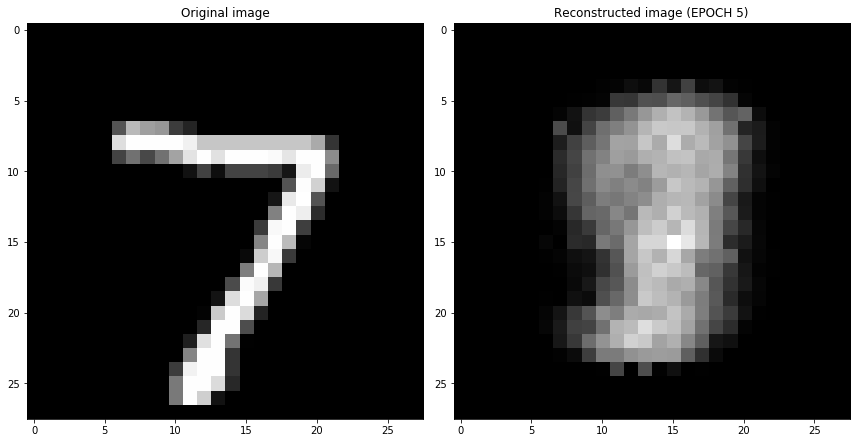

<Figure size 432x288 with 0 Axes>

EPOCH 6/20
	 partial train loss: 0.062407
	 partial train loss: 0.062196
	 partial train loss: 0.062436
	 partial train loss: 0.062698
	 partial train loss: 0.061923
	 partial train loss: 0.063532
	 partial train loss: 0.062853
	 partial train loss: 0.062313
	 partial train loss: 0.062979
	 partial train loss: 0.062085
	 partial train loss: 0.062857
	 partial train loss: 0.063193
	 partial train loss: 0.062895
	 partial train loss: 0.062034
	 partial train loss: 0.063171
	 partial train loss: 0.061398
	 partial train loss: 0.063680
	 partial train loss: 0.062190
	 partial train loss: 0.061441
	 partial train loss: 0.061927
	 partial train loss: 0.061608
	 partial train loss: 0.062520
	 partial train loss: 0.061155
	 partial train loss: 0.061612
	 partial train loss: 0.061564
	 partial train loss: 0.060203
	 partial train loss: 0.060733
	 partial train loss: 0.062616
	 partial train loss: 0.060670
	 partial train loss: 0.061286
	 partial train loss: 0.062010
	 partial train loss: 0.0610

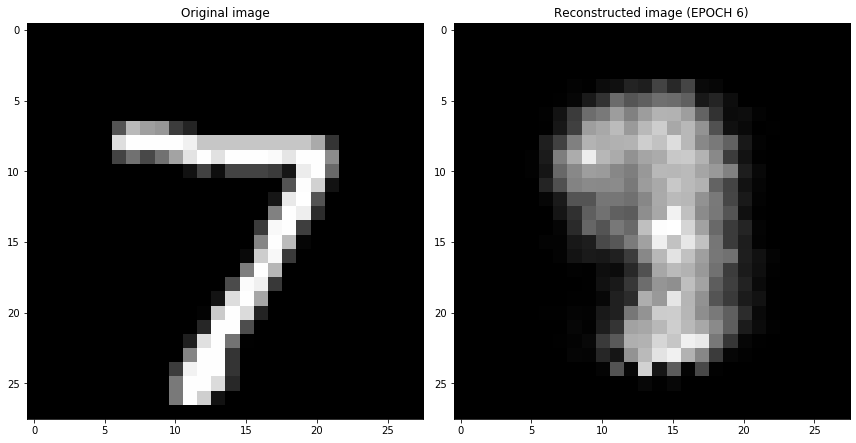

<Figure size 432x288 with 0 Axes>

EPOCH 7/20
	 partial train loss: 0.059797
	 partial train loss: 0.059546
	 partial train loss: 0.059144
	 partial train loss: 0.060331
	 partial train loss: 0.059877
	 partial train loss: 0.060151
	 partial train loss: 0.059736
	 partial train loss: 0.059952
	 partial train loss: 0.059632
	 partial train loss: 0.059226
	 partial train loss: 0.059809
	 partial train loss: 0.059094
	 partial train loss: 0.060087
	 partial train loss: 0.058863
	 partial train loss: 0.059234
	 partial train loss: 0.058528
	 partial train loss: 0.057813
	 partial train loss: 0.059193
	 partial train loss: 0.058722
	 partial train loss: 0.057332
	 partial train loss: 0.057608
	 partial train loss: 0.058799
	 partial train loss: 0.057900
	 partial train loss: 0.058016
	 partial train loss: 0.058823
	 partial train loss: 0.057647
	 partial train loss: 0.056846
	 partial train loss: 0.056181
	 partial train loss: 0.058476
	 partial train loss: 0.056877
	 partial train loss: 0.057326
	 partial train loss: 0.0552

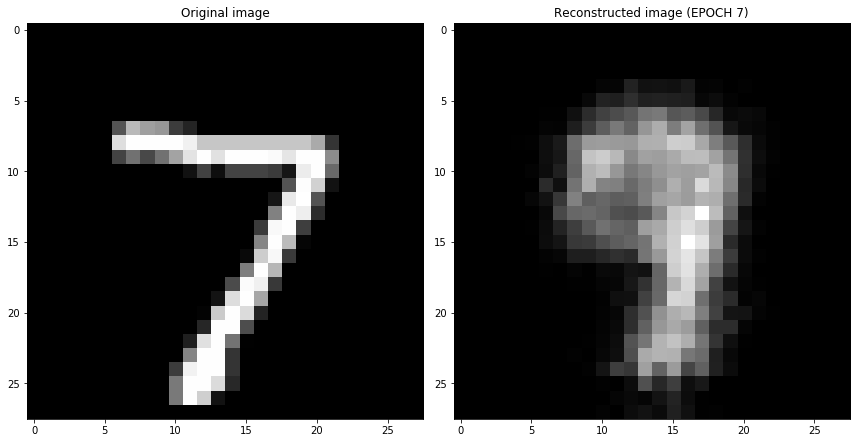

<Figure size 432x288 with 0 Axes>

EPOCH 8/20
	 partial train loss: 0.054547
	 partial train loss: 0.054581
	 partial train loss: 0.054108
	 partial train loss: 0.054024
	 partial train loss: 0.054185
	 partial train loss: 0.054209
	 partial train loss: 0.054246
	 partial train loss: 0.053453
	 partial train loss: 0.054193
	 partial train loss: 0.054239
	 partial train loss: 0.053132
	 partial train loss: 0.053375
	 partial train loss: 0.053519
	 partial train loss: 0.053096
	 partial train loss: 0.053790
	 partial train loss: 0.054204
	 partial train loss: 0.053020
	 partial train loss: 0.053084
	 partial train loss: 0.053581
	 partial train loss: 0.053224
	 partial train loss: 0.053895
	 partial train loss: 0.052801
	 partial train loss: 0.052792
	 partial train loss: 0.053624
	 partial train loss: 0.053169
	 partial train loss: 0.052666
	 partial train loss: 0.054200
	 partial train loss: 0.053041
	 partial train loss: 0.053380
	 partial train loss: 0.052670
	 partial train loss: 0.053367
	 partial train loss: 0.0520

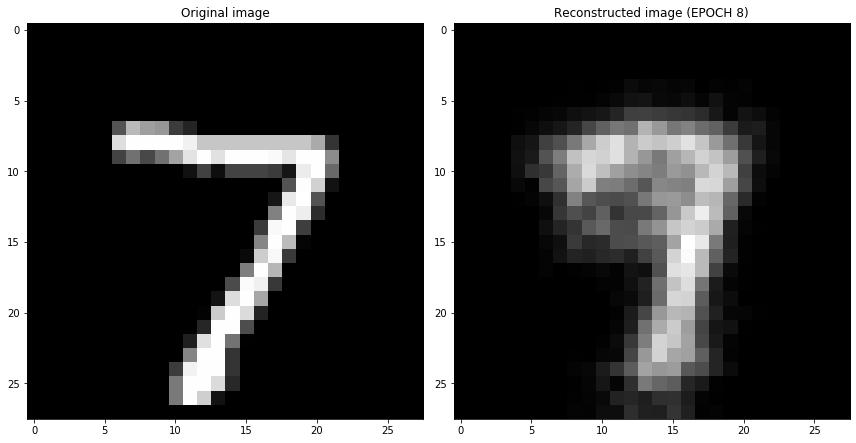

<Figure size 432x288 with 0 Axes>

EPOCH 9/20
	 partial train loss: 0.050304
	 partial train loss: 0.051499
	 partial train loss: 0.051102
	 partial train loss: 0.050097
	 partial train loss: 0.050662
	 partial train loss: 0.050339
	 partial train loss: 0.049596
	 partial train loss: 0.050474
	 partial train loss: 0.050900
	 partial train loss: 0.050026
	 partial train loss: 0.049641
	 partial train loss: 0.049807
	 partial train loss: 0.048596
	 partial train loss: 0.049693
	 partial train loss: 0.049272
	 partial train loss: 0.049845
	 partial train loss: 0.049444
	 partial train loss: 0.048547
	 partial train loss: 0.049018
	 partial train loss: 0.049048
	 partial train loss: 0.048452
	 partial train loss: 0.047338
	 partial train loss: 0.048144
	 partial train loss: 0.048433
	 partial train loss: 0.048345
	 partial train loss: 0.047300
	 partial train loss: 0.048980
	 partial train loss: 0.048305
	 partial train loss: 0.048435
	 partial train loss: 0.048846
	 partial train loss: 0.048417
	 partial train loss: 0.0479

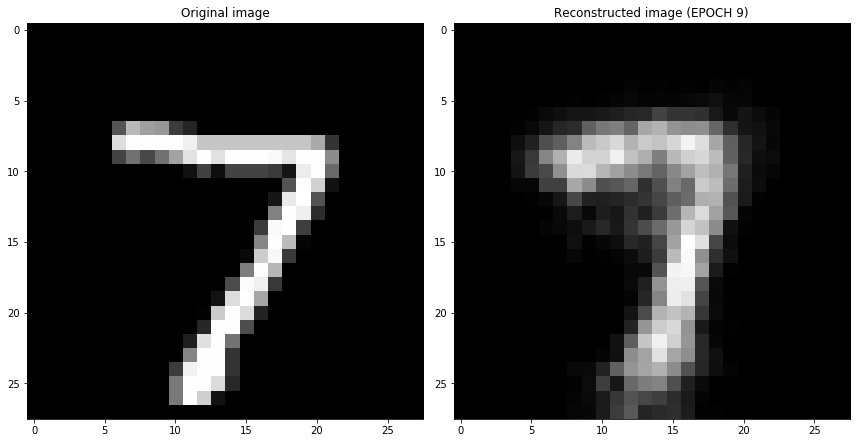

<Figure size 432x288 with 0 Axes>

EPOCH 10/20
	 partial train loss: 0.043856
	 partial train loss: 0.043507
	 partial train loss: 0.043800
	 partial train loss: 0.043912
	 partial train loss: 0.043896
	 partial train loss: 0.043241
	 partial train loss: 0.043541
	 partial train loss: 0.042968
	 partial train loss: 0.042981
	 partial train loss: 0.043397
	 partial train loss: 0.042726
	 partial train loss: 0.042447
	 partial train loss: 0.042966
	 partial train loss: 0.042433
	 partial train loss: 0.042602
	 partial train loss: 0.041402
	 partial train loss: 0.043027
	 partial train loss: 0.042340
	 partial train loss: 0.043172
	 partial train loss: 0.042949
	 partial train loss: 0.043392
	 partial train loss: 0.042502
	 partial train loss: 0.042668
	 partial train loss: 0.042098
	 partial train loss: 0.041291
	 partial train loss: 0.040813
	 partial train loss: 0.041872
	 partial train loss: 0.041798
	 partial train loss: 0.041218
	 partial train loss: 0.041579
	 partial train loss: 0.041369
	 partial train loss: 0.040

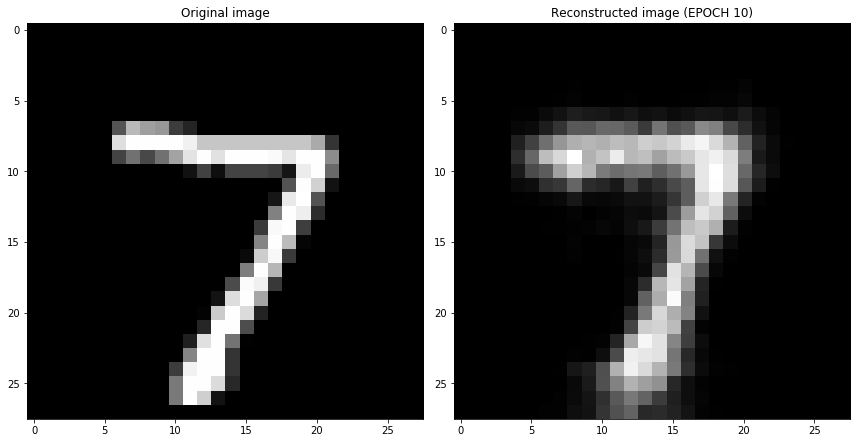

<Figure size 432x288 with 0 Axes>

EPOCH 11/20
	 partial train loss: 0.038874
	 partial train loss: 0.038766
	 partial train loss: 0.038420
	 partial train loss: 0.038175
	 partial train loss: 0.038357
	 partial train loss: 0.037597
	 partial train loss: 0.038875
	 partial train loss: 0.038197
	 partial train loss: 0.037729
	 partial train loss: 0.037235
	 partial train loss: 0.037910
	 partial train loss: 0.037915
	 partial train loss: 0.038088
	 partial train loss: 0.038024
	 partial train loss: 0.037589
	 partial train loss: 0.037016
	 partial train loss: 0.037737
	 partial train loss: 0.037111
	 partial train loss: 0.037287
	 partial train loss: 0.037655
	 partial train loss: 0.037716
	 partial train loss: 0.037275
	 partial train loss: 0.037263
	 partial train loss: 0.037019
	 partial train loss: 0.036813
	 partial train loss: 0.036314
	 partial train loss: 0.037086
	 partial train loss: 0.037093
	 partial train loss: 0.036760
	 partial train loss: 0.036521
	 partial train loss: 0.035970
	 partial train loss: 0.036

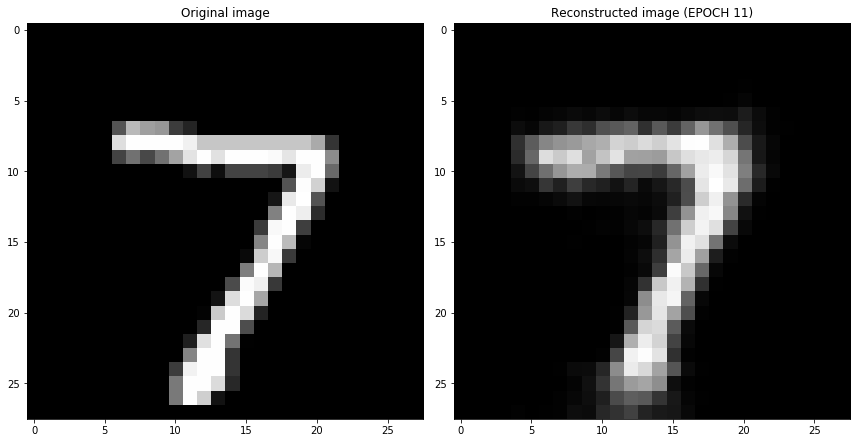

<Figure size 432x288 with 0 Axes>

EPOCH 12/20
	 partial train loss: 0.034545
	 partial train loss: 0.035185
	 partial train loss: 0.034982
	 partial train loss: 0.035023
	 partial train loss: 0.035062
	 partial train loss: 0.034553
	 partial train loss: 0.034762
	 partial train loss: 0.035114
	 partial train loss: 0.034889
	 partial train loss: 0.035192
	 partial train loss: 0.033922
	 partial train loss: 0.033861
	 partial train loss: 0.034846
	 partial train loss: 0.035474
	 partial train loss: 0.033836
	 partial train loss: 0.035040
	 partial train loss: 0.034356
	 partial train loss: 0.034762
	 partial train loss: 0.034331
	 partial train loss: 0.035318
	 partial train loss: 0.035356
	 partial train loss: 0.034182
	 partial train loss: 0.034771
	 partial train loss: 0.034872
	 partial train loss: 0.035215
	 partial train loss: 0.034086
	 partial train loss: 0.034579
	 partial train loss: 0.035556
	 partial train loss: 0.034692
	 partial train loss: 0.034325
	 partial train loss: 0.033946
	 partial train loss: 0.035

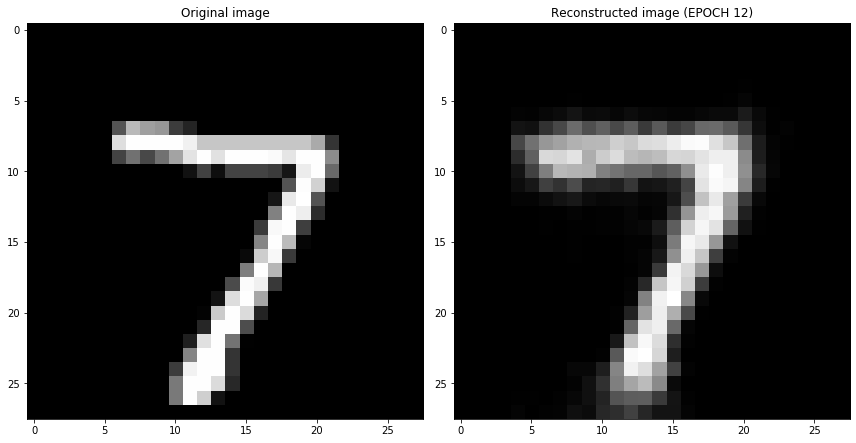

<Figure size 432x288 with 0 Axes>

EPOCH 13/20
	 partial train loss: 0.033293
	 partial train loss: 0.033221
	 partial train loss: 0.033635
	 partial train loss: 0.033797
	 partial train loss: 0.033364
	 partial train loss: 0.032842
	 partial train loss: 0.033594
	 partial train loss: 0.032658
	 partial train loss: 0.033001
	 partial train loss: 0.032439
	 partial train loss: 0.033392
	 partial train loss: 0.033397
	 partial train loss: 0.032709
	 partial train loss: 0.033612
	 partial train loss: 0.033290
	 partial train loss: 0.032791
	 partial train loss: 0.032876
	 partial train loss: 0.032486
	 partial train loss: 0.033034
	 partial train loss: 0.032979
	 partial train loss: 0.033086
	 partial train loss: 0.033037
	 partial train loss: 0.033162
	 partial train loss: 0.033076
	 partial train loss: 0.033115
	 partial train loss: 0.032708
	 partial train loss: 0.032474
	 partial train loss: 0.033018
	 partial train loss: 0.033538
	 partial train loss: 0.032809
	 partial train loss: 0.032301
	 partial train loss: 0.032

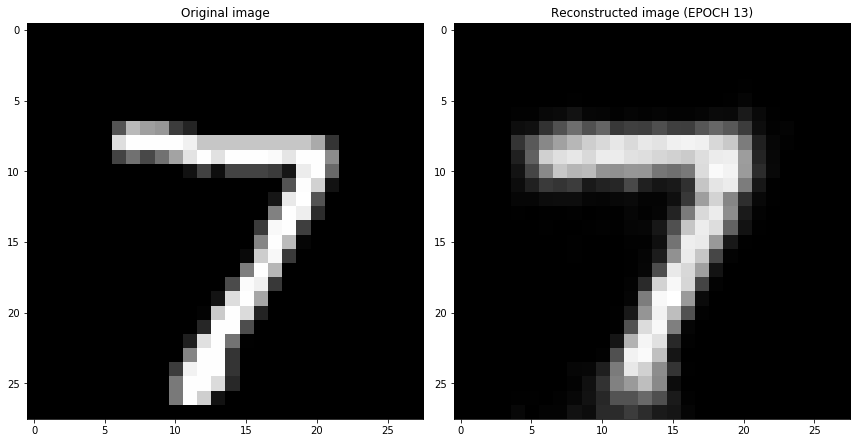

<Figure size 432x288 with 0 Axes>

EPOCH 14/20
	 partial train loss: 0.032032
	 partial train loss: 0.032117
	 partial train loss: 0.032345
	 partial train loss: 0.032055
	 partial train loss: 0.032755
	 partial train loss: 0.031249
	 partial train loss: 0.031739
	 partial train loss: 0.031643
	 partial train loss: 0.031943
	 partial train loss: 0.031804
	 partial train loss: 0.031617
	 partial train loss: 0.031640
	 partial train loss: 0.030618
	 partial train loss: 0.031373
	 partial train loss: 0.032222
	 partial train loss: 0.031392
	 partial train loss: 0.031560
	 partial train loss: 0.031475
	 partial train loss: 0.031498
	 partial train loss: 0.031479
	 partial train loss: 0.031427
	 partial train loss: 0.031807
	 partial train loss: 0.031399
	 partial train loss: 0.031879
	 partial train loss: 0.031794
	 partial train loss: 0.031817
	 partial train loss: 0.031912
	 partial train loss: 0.032126
	 partial train loss: 0.032102
	 partial train loss: 0.031728
	 partial train loss: 0.031971
	 partial train loss: 0.031

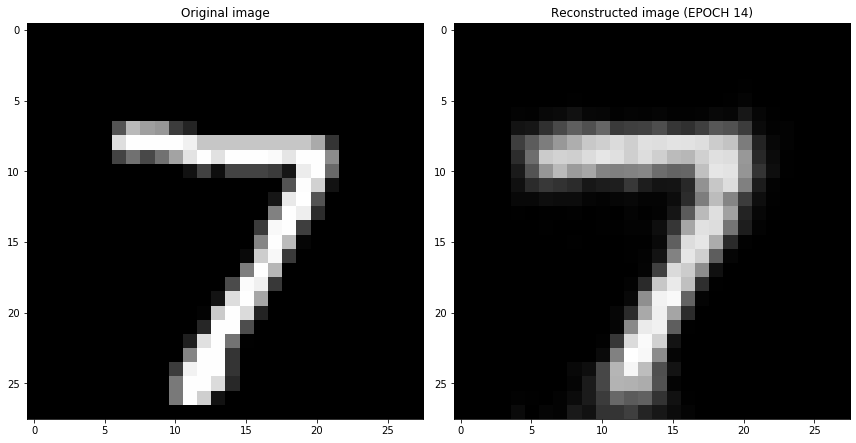

<Figure size 432x288 with 0 Axes>

EPOCH 15/20
	 partial train loss: 0.031319
	 partial train loss: 0.030144
	 partial train loss: 0.030899
	 partial train loss: 0.030268
	 partial train loss: 0.030119
	 partial train loss: 0.030732
	 partial train loss: 0.030609
	 partial train loss: 0.030587
	 partial train loss: 0.029834
	 partial train loss: 0.030239
	 partial train loss: 0.029782
	 partial train loss: 0.030899
	 partial train loss: 0.029536
	 partial train loss: 0.029451
	 partial train loss: 0.029882
	 partial train loss: 0.029934
	 partial train loss: 0.029220
	 partial train loss: 0.029708
	 partial train loss: 0.029377
	 partial train loss: 0.030455
	 partial train loss: 0.029628
	 partial train loss: 0.030008
	 partial train loss: 0.030272
	 partial train loss: 0.029589
	 partial train loss: 0.030450
	 partial train loss: 0.029613
	 partial train loss: 0.029607
	 partial train loss: 0.029913
	 partial train loss: 0.030332
	 partial train loss: 0.029323
	 partial train loss: 0.029601
	 partial train loss: 0.029

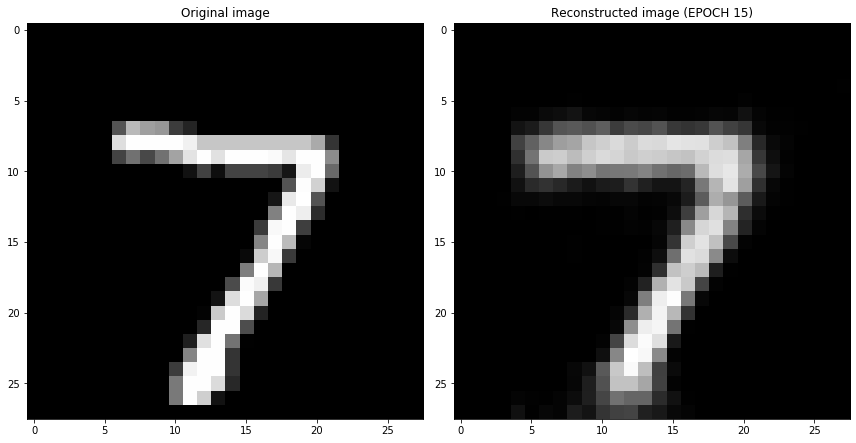

<Figure size 432x288 with 0 Axes>

EPOCH 16/20
	 partial train loss: 0.029125
	 partial train loss: 0.028314
	 partial train loss: 0.029074
	 partial train loss: 0.028707
	 partial train loss: 0.029341
	 partial train loss: 0.028442
	 partial train loss: 0.029274
	 partial train loss: 0.028855
	 partial train loss: 0.028924
	 partial train loss: 0.028407
	 partial train loss: 0.028747
	 partial train loss: 0.028258
	 partial train loss: 0.029037
	 partial train loss: 0.029500
	 partial train loss: 0.028019
	 partial train loss: 0.028183
	 partial train loss: 0.029171
	 partial train loss: 0.028646
	 partial train loss: 0.028700
	 partial train loss: 0.029264
	 partial train loss: 0.028482
	 partial train loss: 0.028470
	 partial train loss: 0.028579
	 partial train loss: 0.028848
	 partial train loss: 0.029014
	 partial train loss: 0.027849
	 partial train loss: 0.028031
	 partial train loss: 0.028179
	 partial train loss: 0.027956
	 partial train loss: 0.028701
	 partial train loss: 0.029137
	 partial train loss: 0.029

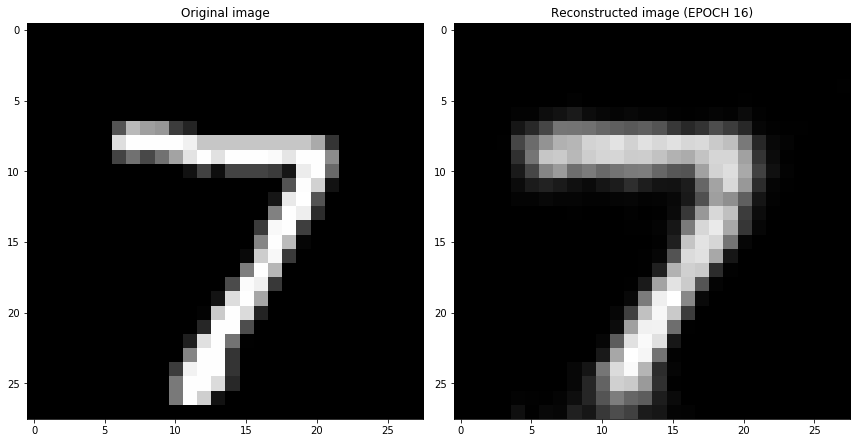

<Figure size 432x288 with 0 Axes>

EPOCH 17/20
	 partial train loss: 0.027510
	 partial train loss: 0.027608
	 partial train loss: 0.027688
	 partial train loss: 0.027242
	 partial train loss: 0.027818
	 partial train loss: 0.028209
	 partial train loss: 0.028196
	 partial train loss: 0.028874
	 partial train loss: 0.027316
	 partial train loss: 0.027862
	 partial train loss: 0.028441
	 partial train loss: 0.027954
	 partial train loss: 0.027573
	 partial train loss: 0.027099
	 partial train loss: 0.028109
	 partial train loss: 0.027831
	 partial train loss: 0.027716
	 partial train loss: 0.027965
	 partial train loss: 0.028108
	 partial train loss: 0.028498
	 partial train loss: 0.027994
	 partial train loss: 0.027494
	 partial train loss: 0.027835
	 partial train loss: 0.027503
	 partial train loss: 0.027212
	 partial train loss: 0.027439
	 partial train loss: 0.028134
	 partial train loss: 0.027984
	 partial train loss: 0.027399
	 partial train loss: 0.027448
	 partial train loss: 0.026785
	 partial train loss: 0.027

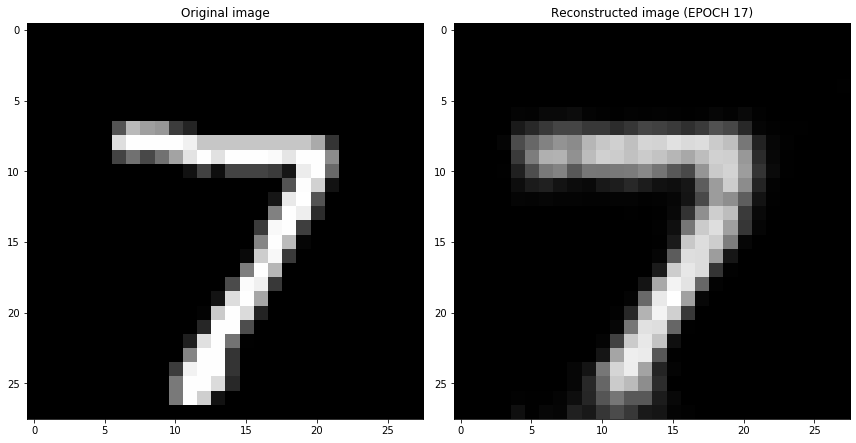

<Figure size 432x288 with 0 Axes>

EPOCH 18/20
	 partial train loss: 0.027248
	 partial train loss: 0.026907
	 partial train loss: 0.026754
	 partial train loss: 0.026752
	 partial train loss: 0.026656
	 partial train loss: 0.027890
	 partial train loss: 0.027123
	 partial train loss: 0.026785
	 partial train loss: 0.026887
	 partial train loss: 0.027518
	 partial train loss: 0.026715
	 partial train loss: 0.027276
	 partial train loss: 0.027288
	 partial train loss: 0.026742
	 partial train loss: 0.027022
	 partial train loss: 0.026850
	 partial train loss: 0.026909
	 partial train loss: 0.026893
	 partial train loss: 0.026772
	 partial train loss: 0.026919
	 partial train loss: 0.026953
	 partial train loss: 0.026983
	 partial train loss: 0.026886
	 partial train loss: 0.027241
	 partial train loss: 0.026986
	 partial train loss: 0.027226
	 partial train loss: 0.025992
	 partial train loss: 0.026699
	 partial train loss: 0.027301
	 partial train loss: 0.026183
	 partial train loss: 0.026612
	 partial train loss: 0.026

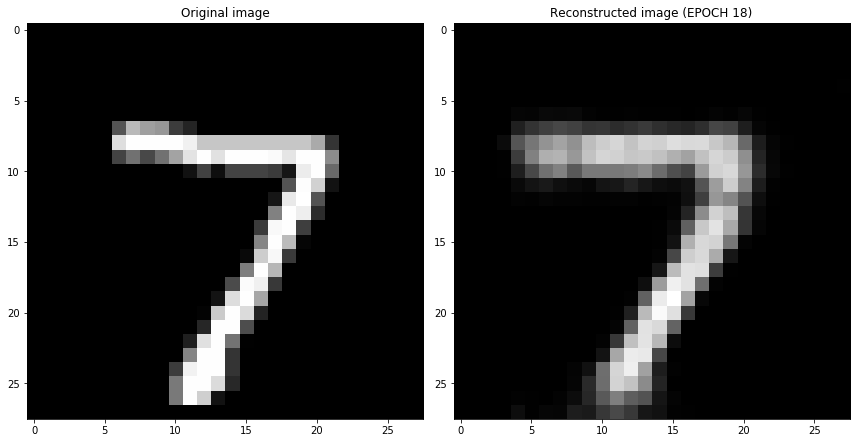

<Figure size 432x288 with 0 Axes>

EPOCH 19/20
	 partial train loss: 0.026425
	 partial train loss: 0.026764
	 partial train loss: 0.026660
	 partial train loss: 0.026587
	 partial train loss: 0.026020
	 partial train loss: 0.026709
	 partial train loss: 0.026699
	 partial train loss: 0.026158
	 partial train loss: 0.026256
	 partial train loss: 0.027107
	 partial train loss: 0.026718
	 partial train loss: 0.026122
	 partial train loss: 0.026814
	 partial train loss: 0.025897
	 partial train loss: 0.026187
	 partial train loss: 0.026285
	 partial train loss: 0.025801
	 partial train loss: 0.026507
	 partial train loss: 0.025792
	 partial train loss: 0.026832
	 partial train loss: 0.026450
	 partial train loss: 0.025939
	 partial train loss: 0.027044
	 partial train loss: 0.025789
	 partial train loss: 0.026923
	 partial train loss: 0.026142
	 partial train loss: 0.025704
	 partial train loss: 0.026299
	 partial train loss: 0.026142
	 partial train loss: 0.026014
	 partial train loss: 0.025512
	 partial train loss: 0.025

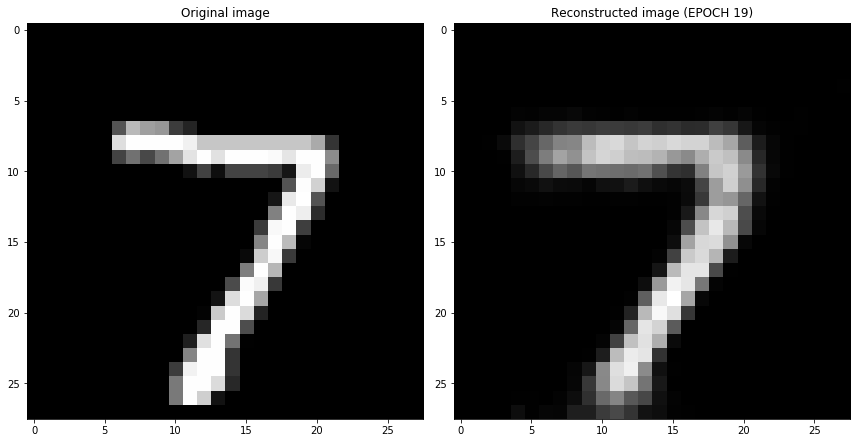

<Figure size 432x288 with 0 Axes>

EPOCH 20/20
	 partial train loss: 0.025185
	 partial train loss: 0.026552
	 partial train loss: 0.026390
	 partial train loss: 0.025839
	 partial train loss: 0.025611
	 partial train loss: 0.026172
	 partial train loss: 0.026137
	 partial train loss: 0.026135
	 partial train loss: 0.025914
	 partial train loss: 0.025839
	 partial train loss: 0.026192
	 partial train loss: 0.026944
	 partial train loss: 0.025162
	 partial train loss: 0.026211
	 partial train loss: 0.025890
	 partial train loss: 0.025541
	 partial train loss: 0.026027
	 partial train loss: 0.025608
	 partial train loss: 0.025597
	 partial train loss: 0.025371
	 partial train loss: 0.025707
	 partial train loss: 0.025514
	 partial train loss: 0.025766
	 partial train loss: 0.026052
	 partial train loss: 0.025910
	 partial train loss: 0.026029
	 partial train loss: 0.025324
	 partial train loss: 0.025924
	 partial train loss: 0.025132
	 partial train loss: 0.025398
	 partial train loss: 0.025772
	 partial train loss: 0.025

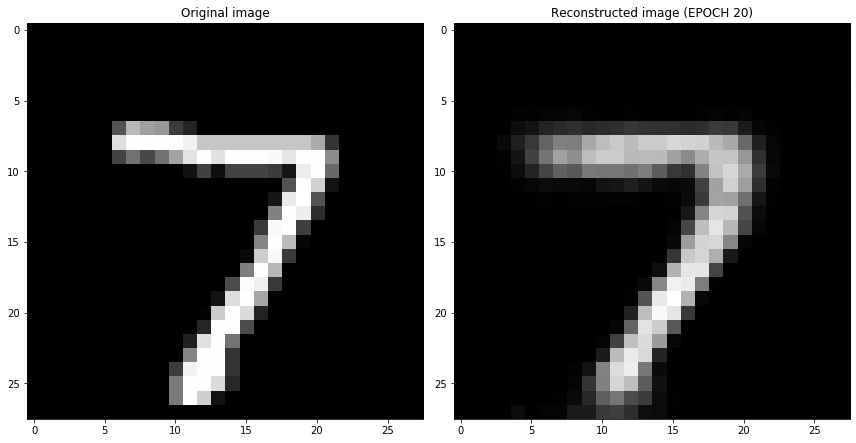

<Figure size 432x288 with 0 Axes>

In [8]:
### Training cycle
training = True
num_epochs = 20
if training:
    for epoch in range(num_epochs):
        print('EPOCH %d/%d' % (epoch + 1, num_epochs))
        ### Training
        train_epoch(net, dataloader=train_dataloader, loss_fn=loss_fn, optimizer=optim, device=device) 
        ### Validation
        val_loss = test_epoch(net, dataloader=test_dataloader, loss_fn=loss_fn, optimizer=optim, device=device) 
        # Print Validationloss
        print('\n\n\t VALIDATION - EPOCH %d/%d - loss: %f\n\n' % (epoch + 1, num_epochs, val_loss))

        ### Plot progress
        img = test_dataset[0][0].unsqueeze(0).to(device)
        net.eval()
        with torch.no_grad():
            rec_img  = net(img)
        fig, axs = plt.subplots(1, 2, figsize=(12,6))
        axs[0].imshow(img.cpu().squeeze().numpy(), cmap='gist_gray')
        axs[0].set_title('Original image')
        axs[1].imshow(rec_img.cpu().squeeze().numpy(), cmap='gist_gray')
        axs[1].set_title('Reconstructed image (EPOCH %d)' % (epoch + 1))
        plt.tight_layout()
        plt.pause(0.1)
        # Save figures
        os.makedirs('autoencoder_progress_%d_features' % encoded_space_dim, exist_ok=True)
        plt.savefig('autoencoder_progress_%d_features/epoch_%d.png' % (encoded_space_dim, epoch + 1))
        plt.show()
        plt.close()

        # Save network parameters
        torch.save(net.state_dict(), 'net_params.pth')
